# Mini Project 3: Machine Learning for Prediction by Regression
In the file house-data.csv you will find data from the property market in King
County, USA.
Your task is to use the data for training a regression model that can be used for
prediction of prices of properties not listed in the file.

Consider cleaning, exploration, and feature engineering of the data before
using it for building a model.

In [1]:
#lets start by importing some of the librarys we need
import pandas as pd
import numpy as np
import os
import chardet

#lets set current_directory as working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

#Now we need to check the decoding of the file

with open('./data/house-data.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Print the detected encoding
print(result['encoding'])

Current Working Directory: C:\Users\Bruger\Python-Projects\MP3
ascii


In [2]:
# Specify the ASCII encoding
df = pd.read_csv('./data/house-data.csv', encoding='ascii')

# lets take a quick peak at some of the data, to see what we have.
print(df.head())


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [3]:
#lets see if any values are null
# count the missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
#good, now lets check the shape and get a better picture of the data
df.shape

(21613, 21)

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
#so lets think about this data. the 0 in bedrooms seems odd (googled and its fine, they just do bedrooms differently than us) - data seems clean now.
#now maybe remove outliers - this next segement might not be needed at all - lets think about that later.
#all we care about is cost, so lets look at the outliers for that first:

In [7]:
# Define a function to remove outliers using z-score
def remove_outliers(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    return df[(z_scores < threshold).all(axis=1)]
numerical_columns = df.select_dtypes(include=np.number).columns

# Remove outliers from numerical columns
df_no_outliers = remove_outliers(df[numerical_columns])

In [8]:
df_no_outliers.shape

(18702, 20)

In [9]:
#so it removed about 3000 outliers
#lets see what attributes matter the least - we will try with sklearn to see

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
import pandas as pd

df = df_no_outliers
# Split the data into features (X) and target variable (y)
y = df['price']
X = df.drop(columns=['price'])

#got an error, it might be that my data isnt clean enough, or i have a to few itterations or alpha(alpha is a tradeof with simplicity(higher number) and accuracy(lower)), heres a line to change it:

lasso = Lasso(alpha=5, max_iter=120000)  # Adjust alpha and max_iter

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Fit Lasso Regression model
lasso = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
lasso.fit(X_train, y_train)

# Get feature importance or coefficient values
lr_feature_importance = lr.coef_
lasso_feature_importance = lasso.coef_

# Print feature importance or coefficient values
print("Linear Regression Feature Importance:")
print(lr_feature_importance)
print("\nLasso Regression Feature Importance:")
print(lasso_feature_importance)


Linear Regression Feature Importance:
[-7.01171590e-07 -1.64530925e+04  2.82748993e+04  6.64441791e+01
  1.09276121e-01  2.97135750e+04 -6.37555786e-10  3.83711677e+04
  2.93471993e+04  8.38159876e+04  3.72905648e+01  2.91536143e+01
 -2.17351042e+03 -5.82076609e-11 -3.34417198e+02  5.69413368e+05
 -9.49540938e+04  4.29335652e+01 -1.23140791e+00]

Lasso Regression Feature Importance:
[-7.01197203e-07 -1.64528830e+04  2.82744721e+04  1.84971855e+02
  1.09268878e-01  2.97135514e+04  0.00000000e+00  3.83704987e+04
  2.93467781e+04  8.38163809e+04 -8.12373583e+01 -8.93733496e+01
 -2.17352756e+03  0.00000000e+00 -3.34400882e+02  5.69406762e+05
 -9.49418864e+04  4.29333000e+01 -1.23143559e+00]


C:\Users\Bruger\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.916e+13, tolerance: 7.980e+10
  model = cd_fast.enet_coordinate_descent(


##

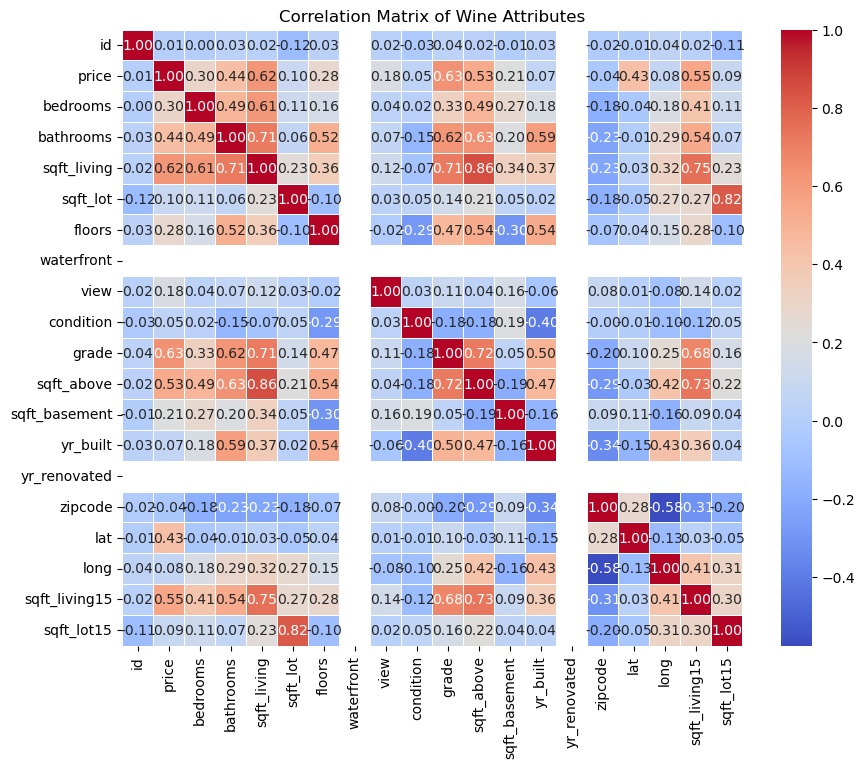

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns
numeric_data = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Wine Attributes')
plt.show()

In [12]:
# according to the regressions done and the heat/correlation map,
# these attributes below are the most uncorrelating values compared to price.

columns_to_drop = ['yr_renovated', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view', 'condition', 
                   'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_lot15']

df.drop(columns=columns_to_drop, inplace=True)

In [13]:
# This is our new data frame
# Sample
df.sample(n=5)

,id,price,sqft_living,waterfront,grade,sqft_above,sqft_living15
6058,2056100275,530000.0,1390,0,8,970,1610
17024,1117300050,537000.0,1550,0,8,1550,2400
6922,7227502155,208000.0,820,0,5,820,1000
2122,2591010240,405000.0,1370,0,7,1370,1380
20139,1773100980,309000.0,1490,0,7,1220,1490


In [16]:
# We will try to perform the linear and the lasso regressions again after we have thinned out the attributes that
# seemed to be of the least significans to the price

y = df['price']
X = df.drop(columns=['price'])

#got an error, it might be that my data isnt clean enough, or i have a to few itterations or alpha(alpha is a tradeof with simplicity(higher number) and accuracy(lower)), heres a line to change it:

lasso = Lasso(alpha=5, max_iter=120000)  # Adjust alpha and max_iter

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Fit Lasso Regression model
lasso = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
lasso.fit(X_train, y_train)

# Get feature importance or coefficient values
lr_feature_importance = lr.coef_
lasso_feature_importance = lasso.coef_

# Print feature importance or coefficient values
print("Linear Regression Feature Importance:")
print(lr_feature_importance)
print("\nLasso Regression Feature Importance:")
print(lasso_feature_importance)

Linear Regression Feature Importance:
[-6.52125817e-07  1.35734510e+02 -5.75482773e-10  8.90180336e+04
 -6.35753163e+01  3.96338411e+01]

Lasso Regression Feature Importance:
[-6.52124582e-07  1.35734587e+02  0.00000000e+00  8.90178115e+04
 -6.35752171e+01  3.96339404e+01]


In [37]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Extract X and y from DataFrame
y = df['price']
X = df.drop(columns=['price'])

# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=2)  # Adjust the degree as needed, we get the highest R-squared by having this set to 2

# Transform features to polynomial features
X_poly = poly.fit_transform(X)

# Fit linear regression model
model = LinearRegression()
model.fit(X_poly, y)


LinearRegression()

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the training set
y_train_pred = model.predict(X_poly)

# Calculate mean squared error and R-squared
mse = mean_squared_error(y, y_train_pred)
r2 = r2_score(y, y_train_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 28051075836.074017
R-squared: 0.4755454155160692


C:\Users\Bruger\AppData\Local\Temp\ipykernel_8228\335340356.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red', label='Perfect prediction')


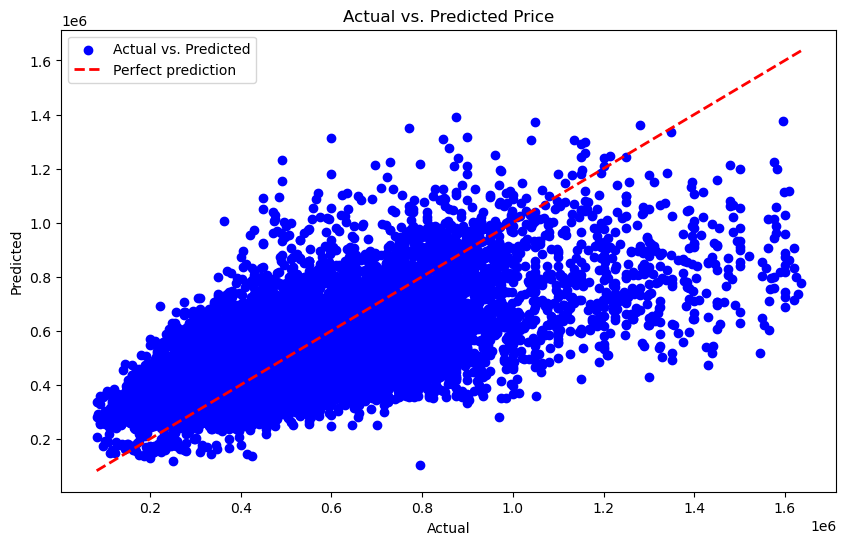

In [39]:
import matplotlib.pyplot as plt

# Predict on the training data
y_pred = model.predict(X_poly)

# Plot actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red', label='Perfect prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Price')
plt.legend()
plt.show()


## Linear regression
- Seems to be the best fit